# 챕터2(퍼셉트론 구현)

In [ ]:
import numpy as np

In [ ]:
class Perceptron:
    """퍼셉트론 분류기

    매개변수
    ------------
    eta : float
      학습률 (0.0과 1.0 사이)
    n_iter : int
      훈련 데이터셋 반복 횟수
    random_state : int
      가중치 무작위 초기화를 위한 난수 생성기 시드

    속성
    -----------
    w_ : 1d-array
      학습된 가중치
    b_ : 스칼라
      학습된 절편 유닛
    errors_ : list
      에포크마다 누적된 분류 오류

    """
    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state

    def fit(self, X, y):
        """훈련 데이터 학습

        매개변수
        ----------
        X : array-like, shape = [n_samples, n_features]
          n_samples개의 샘플과 n_features개의 특성으로 이루어진 훈련 데이터
        y : array-like, shape = [n_samples]
          타깃값

        반환값
        -------
        self : object
        """
        # 가중치 벡터 초기화
        rgen = np.random.RandomState(self.random_state) # 난수 생성기. 시드값으로는 random_state를 넣음
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=X.shape[1])
        self.b_ = np.float_(0.)
        # 오차들을 담을 리스트
        self.errors_ = []

        # 가중치 업데이트 과정
        for _ in range(self.n_iter):
            errors = 0
            # 개별 샘플마다 가중치를 업데이트
            for xi, target in zip(X, y):
                # 예측값과 실제값 사이의 차이를 구한 후 학습률을 곱해서
                update = self.eta * (target - self.predict(xi))
                # 개별 샘플에 대해 가중치 업데이트
                self.w_ += update * xi
                # 개별 샘플에 대해 편향 업데이트
                self.b_ += update
                # 각각의 샘플에 대한 예측값 오차를 더해서 최종적인 오차값 산출
                errors += int(update != 0.0)
            # 최종적으로 구해진 오차를 보관
            self.errors_.append(errors)
        return self

    def net_input(self, X):
        """입력 계산"""
        return np.dot(X, self.w_) + self.b_

    def predict(self, X):
        """단위 계단 함수를 사용하여 클래스 레이블을 반환"""
        return np.where(self.net_input(X) >= 0.0, 1, 0)

In [ ]:
import os
import pandas as pd

try:
    s = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
    print('From URL:', s)
    df = pd.read_csv(s,
                     header=None,
                     encoding='utf-8')

except HTTPError:
    s = 'iris.data'
    print('From local Iris path:', s)
    df = pd.read_csv(s,
                     header=None,
                     encoding='utf-8')

df.tail()

From URL: https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data


,0,1,2,3,4
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


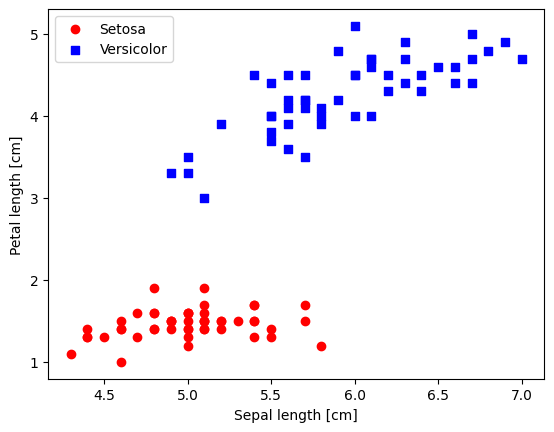

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

# setosa와 versicolor를 선택
y = df.iloc[0:100, 4].values
y = np.where(y == 'Iris-setosa', 0, 1)

# 꽃받침 길이와 꽃잎 길이를 추출
X = df.iloc[0:100, [0, 2]].values

# 산점도를 그리기
plt.scatter(X[:50, 0], X[:50, 1],
            color='red', marker='o', label='Setosa')
plt.scatter(X[50:100, 0], X[50:100, 1],
            color='blue', marker='s', label='Versicolor')

plt.xlabel('Sepal length [cm]')
plt.ylabel('Petal length [cm]')
plt.legend(loc='upper left')

# plt.savefig('images/02_06.png', dpi=300)
plt.show()

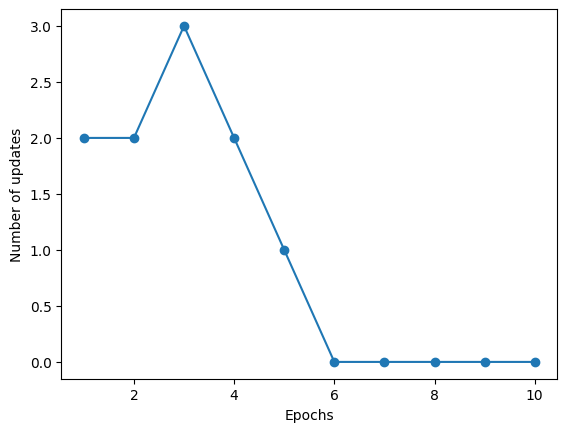

In [ ]:
ppn = Perceptron(eta=0.1, n_iter=10)
ppn.fit(X, y)

plt.plot(range(1, len(ppn.errors_) + 1), ppn.errors_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of updates')
# plt.savefig('images/02_07.png', dpi=300)
plt.show()

결정계수그래프 함수

In [ ]:
from matplotlib.colors import ListedColormap


def plot_decision_regions(X, y, classifier, resolution=0.02):

    # 마커와 컬러맵을 설정합니다
    markers = ('o', 's', '^', 'v', '<')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    lab = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    lab = lab.reshape(xx1.shape)
    plt.contourf(xx1, xx2, lab, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # 샘플의 산점도를 그립니다
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0],
                    y=X[y == cl, 1],
                    alpha=0.8,
                    c=colors[idx],
                    marker=markers[idx],
                    label=f'Class {cl}',
                    edgecolor='black')

아달린 퍼셉트론과 단위계단함수(로젠블라트) 퍼셉트론의 다른 점은
1. fit함수가 가중치를 업데이트 할 때 개별 샘플마다 업데이트를 하는 게 아니라 훈련데이터셋을 한 번 다 보고 업데이트 함
2. 가중치를 업데이틀 할 때 단위계단함수 대신 선형 활성화 함수를 활용 (BUT 여전히 최종 예측을 위해서는 임계함수 사용)

In [ ]:
class AdalineGD:
    """적응형 선형 뉴런 분류기

    매개변수
    ------------
    eta : float
      학습률 (0.0과 1.0 사이)
    n_iter : int
      훈련 데이터셋 반복 횟수
    random_state : int
      가중치 무작위 초기화를 위한 난수 생성기 시드

    속성
    -----------
    w_ : 1d-array
      학습된 가중치
    b_ : 스칼라
      학습된 절편 유닛
    losses_ : list
      각 에포크의 평균 제곱 오차 손실 함수 값

    """
    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state

    def fit(self, X, y):
        """훈련 데이터 학습

        매개변수
        ----------
        X : array-like, shape = [n_samples, n_features]
          n_samples 개의 샘플과 n_features 개의 특성으로 이루어진 훈련 데이터
        y : array-like, shape = [n_samples]
          타깃값

        반환값
        -------
        self : object

        """
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=X.shape[1])
        self.b_ = np.float_(0.)
        self.losses_ = []

        for i in range(self.n_iter):
            # 입력값을 바탕으로 예측값을 계산하고
            net_input = self.net_input(X)
            # 계산된 예측값을 활성함수에 통과시키고
            output = self.activation(net_input)
            # 실제값과 예측값 사이의 오차를 계산하고
            errors = (y - output)
            # 가중치 행렬에 들어있는 가중치들 업데이트
            self.w_ += self.eta * 2.0 * X.T.dot(errors) / X.shape[0]
            # 편향도 업데이트
            self.b_ += self.eta * 2.0 * errors.mean()
            # 최적화 대상인 손실함수 선언
            loss = (errors**2).mean()
            # 손실을 벡터에 모으기
            self.losses_.append(loss)
        return self

    def net_input(self, X):
        """최종 입력 계산"""
        # 예측값 계산을 위한 식. 얘 자체가 예측값으로 쓰일 수도 있고, 여기서 나온 값을 다른 임계함수에 넣어 최종 예측값을 도출 할 수도 있음.
        return np.dot(X, self.w_) + self.b_

    def activation(self, X):
        """선형 활성화 계산"""
        # 간소화를 위해 2장에서는 일부러 아무런 영향이 없는 단순 항등 함수를 선형함수로 활용
        return X

    def predict(self, X):
        """단위 계단 함수를 사용하여 클래스 레이블을 반환"""
        return np.where(self.activation(self.net_input(X)) >= 0.5, 1, 0)

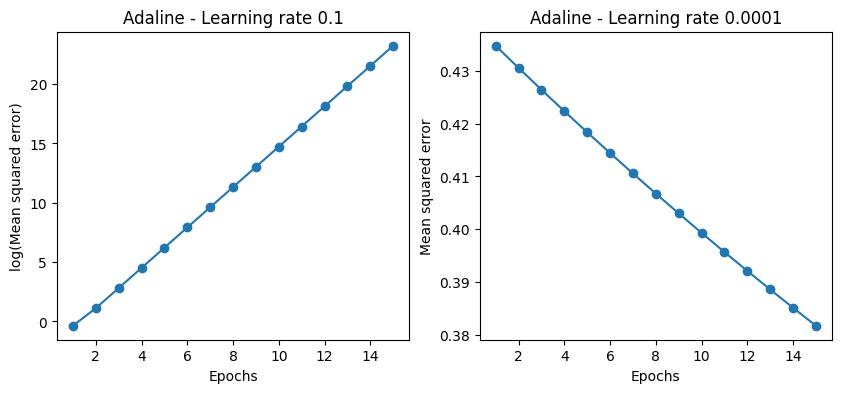

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

ada1 = AdalineGD(n_iter=15, eta=0.1).fit(X, y)
ax[0].plot(range(1, len(ada1.losses_) + 1), np.log10(ada1.losses_), marker='o')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('log(Mean squared error)')
ax[0].set_title('Adaline - Learning rate 0.1')

ada2 = AdalineGD(n_iter=15, eta=0.0001).fit(X, y)
ax[1].plot(range(1, len(ada2.losses_) + 1), ada2.losses_, marker='o')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Mean squared error')
ax[1].set_title('Adaline - Learning rate 0.0001')

# plt.savefig('images/02_11.png', dpi=300)
plt.show()

확률적 경사하강법을 구현. fit부분이 달라진다

In [ ]:
class AdalineSGD:
    """ADAptive LInear NEuron 분류기

    Parameters
    ------------
    eta : float
      학습률 (0.0과 1.0 사이)
    n_iter : int
      훈련 데이터셋 반복 횟수
    shuffle : bool (default: True)
      True로 설정하면 같은 반복이 되지 않도록 에포크마다 훈련 데이터를 섞음
    random_state : int
      가중치 무작위 초기화를 위한 난수 생성기 시드

    Attributes
    -----------
    w_ : 1d-array
      학습된 가중치
    b_ : 스칼라
      학습된 절편 유닛
    losses_ : list
        각 에포크마다 모든 훈련 샘플에 대해 평균한 평균 제곱 오차 손실 함수 값

    """
    def __init__(self, eta=0.01, n_iter=10, shuffle=True, random_state=None):
        self.eta = eta
        self.n_iter = n_iter
        self.w_initialized = False
        self.shuffle = shuffle
        self.random_state = random_state

    def fit(self, X, y):
        """훈련 데이터 학습

        Parameters
        ----------
        X : {array-like}, shape = [n_samples, n_features]
          n_samples 개의 샘플과 n_features 개의 특성으로 이루어진 훈련 데이터
        y : array-like, shape = [n_samples]
          타깃 벡터

        반환값
        -------
        self : object

        """
        self._initialize_weights(X.shape[1]) # 파라미터 초기화
        self.losses_ = []
        for i in range(self.n_iter):
            if self.shuffle:
                X, y = self._shuffle(X, y)
            losses = []
            # 각각의 샘플에 대하여 가중치 업데이트
            for xi, target in zip(X, y):
                losses.append(self._update_weights(xi, target))
            avg_loss = np.mean(losses)
            self.losses_.append(avg_loss)
        return self

    def partial_fit(self, X, y):
        """가중치를 다시 초기화하지 않고 훈련 데이터를 학습"""
        if not self.w_initialized:
            self._initialize_weights(X.shape[1])
        if y.ravel().shape[0] > 1:
            for xi, target in zip(X, y):
                self._update_weights(xi, target)
        else:
            self._update_weights(X, y)
        return self

    def _shuffle(self, X, y):
        """훈련 데이터를 섞기"""
        # np.random의 permutation을 사용해 len(y)-1까지의 숫자 중 중복되지 않는 랜덤한 숫자 시퀀스 반환
        r = self.rgen.permutation(len(y))
        # 랜덤한 숫자 배열인 r을 이용해 X,y를 인덱싱
        return X[r], y[r]

    def _initialize_weights(self, m):
        """랜덤한 작은 수로 가중치를 초기화"""
        self.rgen = np.random.RandomState(self.random_state)
        self.w_ = self.rgen.normal(loc=0.0, scale=0.01, size=m)
        self.b_ = np.float_(0.)
        self.w_initialized = True

    def _update_weights(self, xi, target):
        """아달린 학습 규칙을 적용하여 가중치를 업데이트"""
        output = self.activation(self.net_input(xi))
        error = (target - output)
        self.w_ += self.eta * 2.0 * xi * (error)
        self.b_ += self.eta * 2.0 * error
        loss = error**2
        return loss

    def net_input(self, X):
        """입력 계산"""
        return np.dot(X, self.w_) + self.b_

    def activation(self, X):
        """선형 활성화 계산"""
        return X

    def predict(self, X):
        """단위 계단 함수를 사용하여 클래스 레이블을 반환"""
        return np.where(self.activation(self.net_input(X)) >= 0.5, 1, 0)

In [ ]:
# 특성을 표준화
X_std = np.copy(X)
X_std[:, 0] = (X[:, 0] - X[:, 0].mean()) / X[:, 0].std()
X_std[:, 1] = (X[:, 1] - X[:, 1].mean()) / X[:, 1].std()

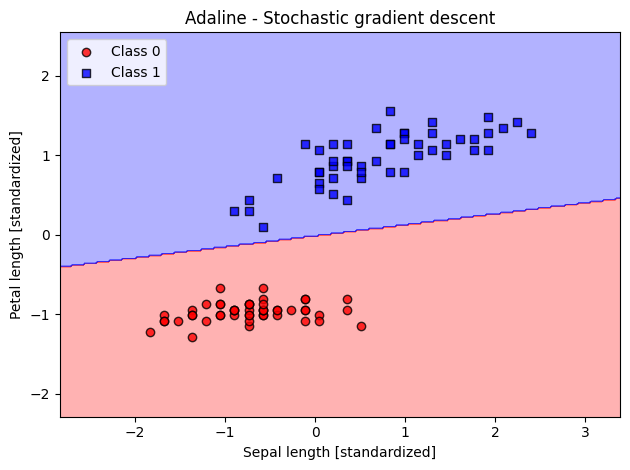

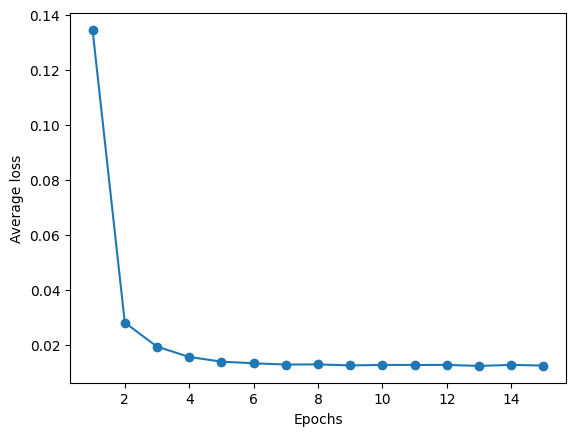

In [ ]:
ada_sgd = AdalineSGD(n_iter=15, eta=0.01, random_state=1)
ada_sgd.fit(X_std, y)

plot_decision_regions(X_std, y, classifier=ada_sgd)
plt.title('Adaline - Stochastic gradient descent')
plt.xlabel('Sepal length [standardized]')
plt.ylabel('Petal length [standardized]')
plt.legend(loc='upper left')

plt.tight_layout()
#plt.savefig('figures/02_15_1.png', dpi=300)
plt.show()

plt.plot(range(1, len(ada_sgd.losses_) + 1), ada_sgd.losses_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Average loss')

#plt.savefig('figures/02_15_2.png', dpi=300)
plt.show()

# 챕터3(사이킷런 및 분류모델)

In [ ]:
from sklearn import datasets
import numpy as np
iris = datasets.load_iris()
# 꽃 샘플에서 꽃잎 길이와 너비 특성을 행렬 X에 저장
X = iris.data[:,[2,3]]
y = iris.target
# 고유한 붓꽃 클래스 반환(이미 정수변환 되어 있음)
print(np.unique(y))

[0 1 2]


In [ ]:
# 훈련된 모델의 성능 평가를 위한 데이터셋 마련. 전체 데이터 중 30프로는 테스트 데이터로
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=1, stratify=y)

In [ ]:
# numpy의 bincount를 통해 배열에 있는 고윳값의 등장 횟수를 알 수 있음
print(np.bincount(y))
print(np.bincount(y_train))
print(np.bincount(y_test))

[50 50 50]
[35 35 35]
[15 15 15]


In [ ]:
# 최적화 알고리즘이 최상의 성능을 내려면 feature(특성)들의 스케일 조정 필요
from sklearn.preprocessing import StandardScaler
# 스케일러 객체 생성
sc = StandardScaler()
# X_train의 각각의 feature들에 대해서(즉, 각 특성 차원마다) 평균과 표준편차 계산
sc.fit(X_train)
# 위에서 계산된 평균과 표준편차로 데이터셋을 표준화
X_train_stdrd = sc.transform(X_train)
X_test_stdrd = sc.transform(X_test)

훈련데이터의 전처리가 끝났으니 이제 모델을 훈련시킬 차례

In [ ]:
from sklearn.linear_model import Perceptron
ppn = Perceptron(eta0=0.1, random_state=1)
ppn.fit(X_train_stdrd, y_train)

Perceptron(eta0=0.1, random_state=1)

훈련을 했으니 이제 예측을 할 차례

In [ ]:
y_pred = ppn.predict(X_test_stdrd)
print("잘못 분류한 횟수 : %d" %(y_test != y_pred).sum())

잘못 분류한 횟수 : 1


In [ ]:
# 모델의 성능 지표
from sklearn.metrics import accuracy_score
# 모델의 정확도 계산
# print(ppn.score(X_test_stdrd, y_test))
print(accuracy_score(y_test, y_pred))

0.9777777777777777


In [ ]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

# 맷플롯립 호환성을 체크
import matplotlib
from distutils.version import LooseVersion


def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):

    # 마커와 컬러맵을 설정
    markers = ('o', 's', '^', 'v', '<')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # 결정 경계 그리기
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    # 2차원 평면에 표현하기 위해 xx1, xx2라는 각 특성에 대한 2차원 배열 생성
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    # 2차원 배열인 xx1과 xx2를 1차원으로 평탄화 후 transpose하여 (샘플 수, 특성 수)의 shape으로 만들어 예측 실행
    lab = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    # 2차원 평면에 값들을 찍기 위해 원래 모양으로 변환
    lab = lab.reshape(xx1.shape)
    plt.contourf(xx1, xx2, lab, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max()) # x축 범위 지정
    plt.ylim(xx2.min(), xx2.max()) # y축 범위 지정

    # 클래스 샘플을 표시
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0],
                    y=X[y == cl, 1],
                    alpha=0.8,
                    c=colors[idx],
                    marker=markers[idx],
                    label=f'Class {cl}',
                    edgecolor='black')

    # 테스트 샘플을 부각.
    if test_idx:
        # 모든 샘플을 그림.
        X_test, y_test = X[test_idx, :], y[test_idx]

        plt.scatter(X_test[:, 0],
                    X_test[:, 1],
                    c='none',
                    edgecolor='black',
                    alpha=1.0,
                    linewidth=1,
                    marker='o',
                    s=100,
                    label='Test set')

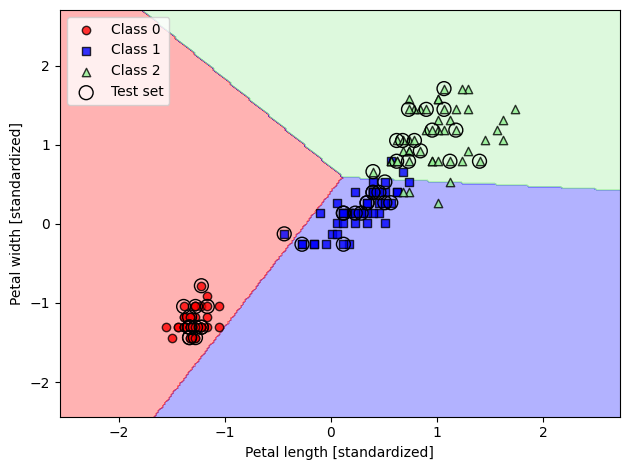

In [ ]:
X_combined_stdrd = np.vstack((X_train_stdrd, X_test_stdrd))
y_combined = np.hstack((y_train, y_test))

plot_decision_regions(X=X_combined_stdrd, y=y_combined,
                      classifier=ppn, test_idx=range(105, 150))
plt.xlabel('Petal length [standardized]')
plt.ylabel('Petal width [standardized]')
plt.legend(loc='upper left')

plt.tight_layout()
#plt.savefig('figures/03_01.png', dpi=300)
plt.show()

퍼셉트론 알고리즘은 선형적으로 구분되지 않는 데이터셋에 수렴X. 이를 극복할 방안으로 또다른 선형 분류 모델인 로지스틱 회귀 사용 가능.

In [ ]:
# 이진 분류에만 사용 가능한 로지스틱 모델
class LogisticRegressionGD:
    """경사 하강법을 사용한 로지스틱 회귀 분류기

    매개변수
    ------------
    eta : float
      학습률 (0.0과 1.0 사이)
    n_iter : int
      훈련 데이터셋 반복 횟수
    random_state : int
      가중치 무작위 초기화를 위한 난수 생성기 시드

    속성
    -----------
    w_ : 1d-array
      학습된 가중치
    b_ : 스칼라
      학습된 절편 유닛
    losses_ : list
      각 에포크의 평균 제곱 오차 손실 함수 값

    """
    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state

    def fit(self, X, y):
        """훈련 데이터 학습

        매개변수
        ----------
        X : {array-like}, shape = [n_samples, n_features]
          n_samples 개의 샘플과 n_features 개의 특성으로 이루어진 훈련 데이터
        y : array-like, shape = [n_samples]
          타깃값

        반환값
        -------
        self : object

        """
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=X.shape[1])
        self.b_ = np.float_(0.)
        self.losses_ = []

        for i in range(self.n_iter):
            net_input = self.net_input(X)
            output = self.activation(net_input)
            errors = (y - output)
            self.w_ += self.eta * X.T.dot(errors) / X.shape[0]
            self.b_ += self.eta * errors.mean()
            loss = (-y.dot(np.log(output)) - (1 - y).dot(np.log(1 - output))) / X.shape[0]
            self.losses_.append(loss)
        return self

    def net_input(self, X):
        """최종 입력 계산"""
        return np.dot(X, self.w_) + self.b_

    def activation(self, z):
        """로지스틱 시그모이드 활성화 계산"""
        return 1. / (1. + np.exp(-np.clip(z, -250, 250)))

    def predict(self, X):
        """단위 계단 함수를 사용하여 클래스 레이블을 반환합니다"""
        return np.where(self.activation(self.net_input(X)) >= 0.5, 1, 0)

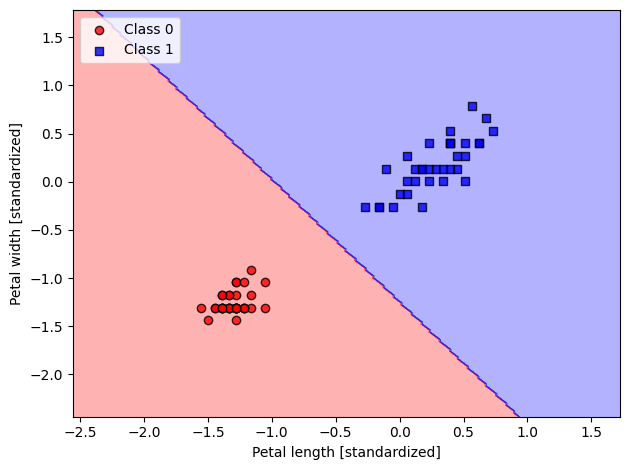

In [ ]:
X_train_01_subset = X_train_stdrd[(y_train == 0) | (y_train == 1)]
y_train_01_subset = y_train[(y_train == 0) | (y_train == 1)]

lrgd = LogisticRegressionGD(eta=0.3, n_iter=1000, random_state=1)
lrgd.fit(X_train_01_subset,
         y_train_01_subset)

plot_decision_regions(X=X_train_01_subset,
                      y=y_train_01_subset,
                      classifier=lrgd)

plt.xlabel('Petal length [standardized]')
plt.ylabel('Petal width [standardized]')
plt.legend(loc='upper left')

plt.tight_layout()
#plt.savefig('figures/03_05.png', dpi=300)
plt.show()

이제는 사이킷런의 로지스틱 모델을 사용해 다중분류 시행

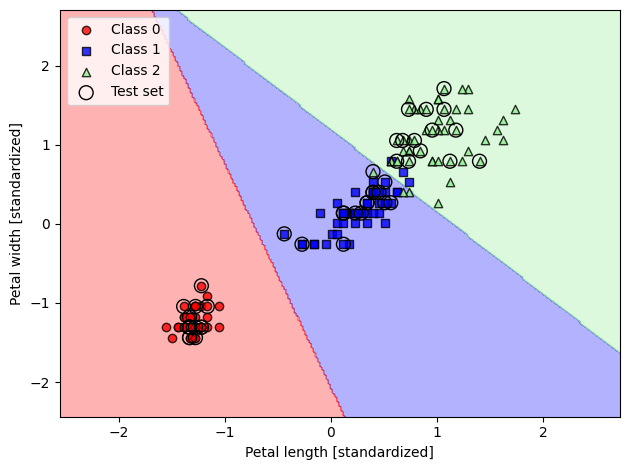

In [ ]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(C=100.0, solver='lbfgs', multi_class='ovr') # C는 규제 하이퍼파리미터 람다의 역수, solver는 최적화 함수, multi_class는 다중분류 모델 뭘 쓸 건지
lr.fit(X_train_stdrd, y_train)

plot_decision_regions(X_combined_stdrd, y_combined,
                      classifier=lr, test_idx=range(105, 150))
plt.xlabel('Petal length [standardized]')
plt.ylabel('Petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
#plt.savefig('figures/03_06.png', dpi=300)
plt.show()

In [ ]:
# 각 클래스에 속할 확률. 각 행은 해당 샘플이 각각의 클래스에 속할 확률을 보여줌.
lr.predict_proba(X_test_stdrd[:3,:])

array([[3.81527885e-09, 1.44792866e-01, 8.55207131e-01],
       [8.34020679e-01, 1.65979321e-01, 3.25737138e-13],
       [8.48831425e-01, 1.51168575e-01, 2.62277619e-14]])

In [ ]:
# 각 행(axis=1)에서 확률이 가장 높은 값(클래스=열)를 뽑기.
lr.predict_proba(X_test_stdrd[:3,:]).argmax(axis=1)

array([2, 0, 0])

In [ ]:
lr.predict(X_test_stdrd[:3,:])

array([2, 0, 0])

사이킷런은 입력데이터로 2차워 배열을 기대. 따라서 하나의 샘플에 대한 예측을 수행하고자 할 때, 그 녀석을 2차원으로 변환해줘야함

In [ ]:
print(X_test_stdrd[0,:])
print(X_test_stdrd[0,:].shape) # 원소가 2개 든 1차원 배열
print(X_test_stdrd[0,:].reshape(1,-1)) # 행을 1개 추가하고, 2차원 열은 원소 개수에 맞춰 자동으로(-1) 맞춰 2차원 배열 생성
print(X_test_stdrd[0,:].reshape(1,-1).shape) # 행 1개, 열 2개의 2차원 배열
lr.predict(X_test_stdrd[0,:].reshape(1,-1)) # 1차원을 2차원으로 바꾸고 예측

[0.89820289 1.44587881]
(2,)
[[0.89820289 1.44587881]]
(1, 2)


array([2])

서포트 벡터 머신

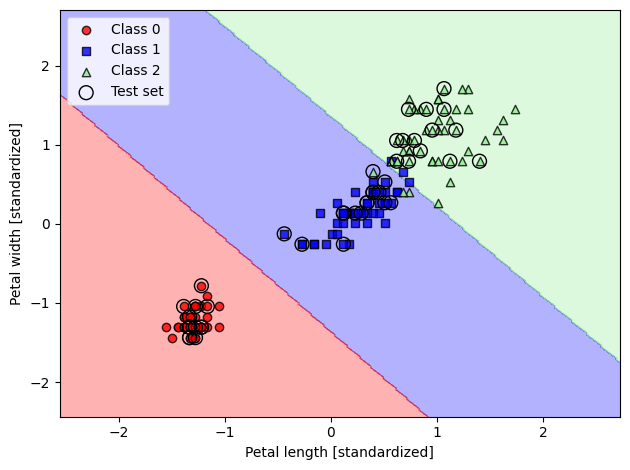

In [ ]:
from sklearn.svm import SVC
svm = SVC(kernel='linear', C=1.0, random_state=1)
svm.fit(X_train_stdrd, y_train)
plot_decision_regions(X_combined_stdrd,
                      y_combined,
                      classifier=svm,
                      test_idx=range(105, 150))
plt.xlabel('Petal length [standardized]')
plt.ylabel('Petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
#plt.savefig('figures/03_11.png', dpi=300)
plt.show()

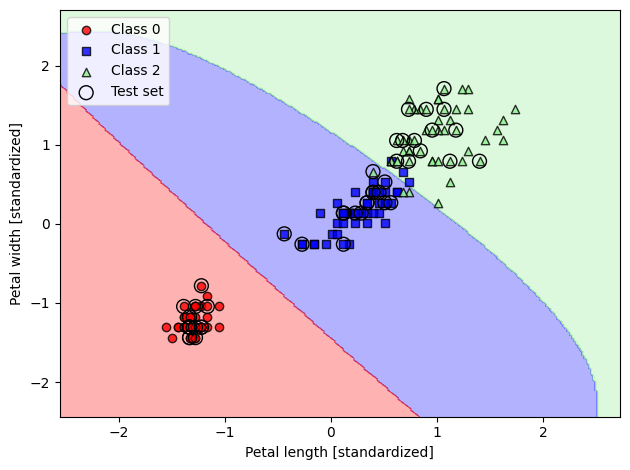

In [ ]:
from sklearn.svm import SVC
svm = SVC(kernel='rbf', C=1.0, random_state=1, gamma=0.2) # gamma값이 클수록 과대적합
svm.fit(X_train_stdrd, y_train)
plot_decision_regions(X_combined_stdrd,
                      y_combined,
                      classifier=svm,
                      test_idx=range(105, 150))
plt.xlabel('Petal length [standardized]')
plt.ylabel('Petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
#plt.savefig('figures/03_11.png', dpi=300)
plt.show()

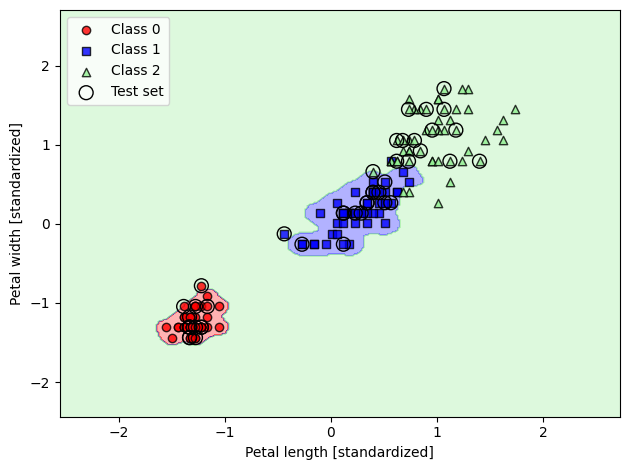

In [ ]:
svm = SVC(kernel='rbf', random_state=1, gamma=100.0, C=1.0)
svm.fit(X_train_stdrd, y_train) # 훈련 데이터에서 모델 파라미터 학습

plot_decision_regions(X_combined_stdrd, y_combined,
                      classifier=svm, test_idx=range(105, 150))
plt.xlabel('Petal length [standardized]')
plt.ylabel('Petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
#plt.savefig('figures/03_16.png', dpi=300)
plt.show()

# 챕터 4(데이터 전처리, 특성 선택)

범주형 데이터 인코딩

In [ ]:
import pandas as pd
df = pd.DataFrame([
    ['green','M',10.1,'class2'],
    ['red','L',13.5,'class1'],
    ['blue','XL',15.3,'class2'],
])
df.columns = ['color','size','price','classlabel']
df

,color,size,price,classlabel
0,green,M,10.1,class2
1,red,L,13.5,class1
2,blue,XL,15.3,class2


In [ ]:
# 순서가 있는 특성 매핑
size_mapping={
    'XL':3,
    'L':2,
    'M':1
}
# size를 숫자로 매핑
df['size'] = df['size'].map(size_mapping)
df

,color,size,price,classlabel
0,green,1,10.1,class2
1,red,2,13.5,class1
2,blue,3,15.3,class2


In [ ]:
# 만약 size를 다시 문자열 표현으로 바꾸고 싶으면 다음과 같이 가능
inv_size_mapping = {k:v for v,k in size_mapping.items()}
df['size'].map(inv_size_mapping)

,size
0,M
1,L
2,XL


In [ ]:
# 이번에는 클래스 레이블을 정수로 인코딩
import numpy as np
class_mapping = {label:idx for idx, label in enumerate(np.unique(df['classlabel']))}
class_mapping

{'class1': 0, 'class2': 1}

In [ ]:
df['classlabel'] = df['classlabel'].map(class_mapping)
df

,color,size,price,classlabel
0,green,1,10.1,1
1,red,2,13.5,0
2,blue,3,15.3,1


In [ ]:
# 다시 문자열 표현으로 바꾸고 싶다면 size할 때처럼 할 수 있음
inv_class_mapping = {k:v for v,k in class_mapping.items()}
df['classlabel'] = df['classlabel'].map(inv_class_mapping)
df

,color,size,price,classlabel
0,green,1,10.1,class2
1,red,2,13.5,class1
2,blue,3,15.3,class2


In [ ]:
# 사이킷런의 LabelEncoder를 사용하면 편리하게 인코딩 가능
from sklearn.preprocessing import LabelEncoder
class_le = LabelEncoder()
# classlabel을 정수로 인코딩
y = class_le.fit_transform(df['classlabel'].values) # 훈련데이터로부터 파라미터를 학습하고 이렇게 학습한 파라미터로 나중에 테스트 데이터를 변환(훈련데이터셋에서 classlabel을 정수로 변환할 때, 변환을 위해 LabelEncoder객체가 파라미터를 학습하는데, 이 학습된 파라미터를 테스트 데이터셋의 class label을 정수로 변환할 때 사용)
y

array([1, 0, 1])

In [ ]:
# 문자열 형태로 되돌리기
class_le.inverse_transform(y)

array(['class2', 'class1', 'class2'], dtype=object)

In [ ]:
# color열의 값들도 LabelEncoder로 당연히 변환 가능
X = df[['color','size','price']].values
color_le = LabelEncoder()
X[:,0] = color_le.fit_transform(X[:,0])
X

array([[1, 1, 10.1],
       [2, 2, 13.5],
       [0, 3, 15.3]], dtype=object)

LabelEncoder는 1차원 배열만 받기 때문에 인코딩 할 열이 많으면 똑같은 거 반복해야함.

이때 OrdinalEncoder나 ColumnTrasnsformer 사용 가능

In [ ]:
# 범주형 데이터를 정수로 인코딩 해주는 모델
from sklearn.compose import ColumnTransformer
# 데이프레임의 각각의 열마다 다른 변환을 적용하도록 도와주는 모델
from sklearn.preprocessing import OrdinalEncoder

# 인코더 선언
ord_enc = OrdinalEncoder(dtype=int) # 정수로 인코딩 하기 위해 dtype은 int로 설정.
col_trans = ColumnTransformer([('ord_enc', ord_enc, ['color'])]) # ColumnTransformer는 트랜스포머 리스트를 받고, 이때 트랜스포머는 (이름,변환기,변환할 열의 리스트)로 구성된 튜플임.
# 데이터 변환
X_trans = col_trans.fit_transform(df)
X_trans

array([[1],
       [2],
       [0]])

원-핫 인코딩

In [ ]:
from sklearn.preprocessing import OneHotEncoder
X = df[['color','size','price']].values
color_ohe = OneHotEncoder()
# color열만 선택해서 원-핫 인코딩 적용 / OneHotEncoder는 input으로 2d를 기대하기 때문에 reshape을 해서 차원을 1차원에서 2차원으로 변환함
color_ohe.fit_transform(X[:,0].reshape(-1,1)).toarray()

array([[0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.]])

여러 feature가 있는 상황에서 하나의 열에만 변환을 적용하려면 ColumnTransformer 이용 가능

In [ ]:
from sklearn.compose import ColumnTransformer
X = df[['color','size','price']].values
c_trans = ColumnTransformer([
    ('onehot',OneHotEncoder(dtype=int), [0]), # 0번째 열에는 적용
    ('nothing','passthrough', [1, 2]), # 나머지 열에는 미적용
])
c_trans.fit_transform(X)

array([[0, 1, 0, 1, 10.1],
       [0, 0, 1, 2, 13.5],
       [1, 0, 0, 3, 15.3]], dtype=object)

혹은 그냥 판다스의 get_dummies를 이용해서 카테고리를 나타내는 더미 변수를 만들 수도 있음

In [ ]:
pd.get_dummies(df[['price','color','size']])

,price,size,color_blue,color_green,color_red
0,10.1,1,False,True,False
1,13.5,2,False,False,True
2,15.3,3,True,False,False


In [ ]:
# 특정 열을 변환
pd.get_dummies(df[['price','color','size']], columns=['size'])

,price,color,size_1,size_2,size_3
0,10.1,green,True,False,False
1,13.5,red,False,True,False
2,15.3,blue,False,False,True


이제는 훈련 데이터셋과 테스트 데이터셋으로 나누는 걸 실습

In [ ]:
df_wine = pd.read_csv('https://archive.ics.uci.edu/'
                      'ml/machine-learning-databases/wine/wine.data',
                      header=None)

# UCI 머신러닝 저장소의 Wine 데이터셋에 접근되지 않을 때
# df_wine = pd.read_csv('wine.data', header=None)


df_wine.columns = ['Class label', 'Alcohol', 'Malic acid', 'Ash',
                   'Alcalinity of ash', 'Magnesium', 'Total phenols',
                   'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins',
                   'Color intensity', 'Hue', 'OD280/OD315 of diluted wines',
                   'Proline']

print('Class labels', np.unique(df_wine['Class label']))
df_wine.head()

Class labels [1 2 3]


,Class label,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [ ]:
from sklearn.model_selection import train_test_split
X, y = df_wine.iloc[:,1:].values, df_wine.iloc[:,0].values
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=0, stratify=y) # stratify는 층화추출 여부 결정

데이터셋을 나눴으면 이제 특성들 간 스케일 맞추기

In [ ]:
# 정규화
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
X_train_norm = mms.fit_transform(X_train)
X_test_norm = mms.transform(X_test)

In [ ]:
# 표준화
from sklearn.preprocessing import StandardScaler

stdsc = StandardScaler()
X_train_std = stdsc.fit_transform(X_train)
X_test_std = stdsc.transform(X_test)

In [ ]:
# 3분위수와 1분위수의 차이를 나누어 스케일 조정하는 또다른 방법.
from sklearn.preprocessing import RobustScaler
rbs = RobustScaler() # 이상치가 많고 크기가 작은 데이터셋에 유리.
X_train_robust = rbs.fit_transform(X_train)
X_test_robust = rbs.transform(X_test)

유용한 특성 선택하기

In [ ]:
# L1 규제는 해당 규제를 제공하는 모델에서 penalty 매개변수를 l1으로 지정하면 됨.
from sklearn.linear_model import LogisticRegression
LogisticRegression(penalty='l1')

LogisticRegression(penalty='l1')

In [ ]:
# 표준화 처리된 Wine 데이터에 L1 규제가 있는 로지스틱 회귀를 적용하면 다음과 같은 희소 모델이 생성.
lr = LogisticRegression(penalty='l1',C=1.0, solver='liblinear', multi_class='ovr') # 최적화 알고리즘은 liblinear, 다중 분류 전략은 ovr(One-vs-Rest).
# 규제 효과를 높이거나 낮추려면 C값을 증가시키거나 감소시켜야함. C=1.0이 기본값.
lr.fit(X_train_std, y_train)
print('훈련 정확도 : ', lr.score(X_train_std, y_train))
print('테스트 정확도 : ', lr.score(X_test_std, y_test))

훈련 정확도 :  1.0
테스트 정확도 :  1.0


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


In [ ]:
"""
OVR(One-Vs-Rest) : 다중 클래스 분류 문제에서 여러 개의 클래스를 구분할 때, OVR 방식은 각 클래스를 "나머지 모든 클래스"와 비교하는 방식
예를 들어, 데이터셋에 3개의 클래스 (A, B, C)가 있을 때, OVR은 이 문제를 3개의 이진 분류 문제로 나눔:
클래스 A vs 클래스 B와 C (나머지)  /  클래스 B vs 클래스 A와 C (나머지)  /  클래스 C vs 클래스 A와 B (나머지)
이렇게 각각의 클래스를 나머지와 비교하는 여러 개의 분류기를 만들고, 새로운 데이터를 예측할 때는 각 분류기의 결과를 기반으로 가장 적합한 클래스를 선택.
"""
# 그러므로 LogisticRegression객체의 이 세 절편은 순서대로 각각 클래스1을 2,3과 구분하는 모델에 속하는 것, 클래스2를 1,3과 구분하는 모델에 속하는 것.... 임.
lr.intercept_

array([-1.26312345, -1.21533123, -2.36979181])

In [ ]:
# 훈련데이터에 fit한 다중 클래스 분류기(LogisticRegression객체)가 갖는 각 클래스별 가중치 벡터를 출력.
# 이때 C(L1규제)를 설정했기 때문에 가중치가 0인 애들이 생김. 가중치가 0인 애들은 L1규제에 의해 예측 모델에서 안 쓰이는 특성이 된 것임.
# 모델이 13개의 가중치를 갖는 이유는 데이터의 특성 개수가 13개이기 때문. 이렇게 만들어진 가중치를 모델이 클래스 예측(분류)할 때 쓰는 것.
lr.coef_

array([[ 1.24588102,  0.18099131,  0.74269541, -1.16025555,  0.        ,
         0.        ,  1.17338309,  0.        ,  0.        ,  0.        ,
         0.        ,  0.54435783,  2.51109608],
       [-1.53851031, -0.38661203, -0.99536355,  0.3647294 , -0.05997361,
         0.        ,  0.6671374 ,  0.        ,  0.        , -1.93349289,
         1.23540141,  0.        , -2.23028522],
       [ 0.13527893,  0.16902915,  0.35743004,  0.        ,  0.        ,
         0.        , -2.4365177 ,  0.        ,  0.        ,  1.56360962,
        -0.81894135, -0.49362492,  0.        ]])

규제강도를 달리 하여 가중치의 변화를 그래프로 찍어보기

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was depre

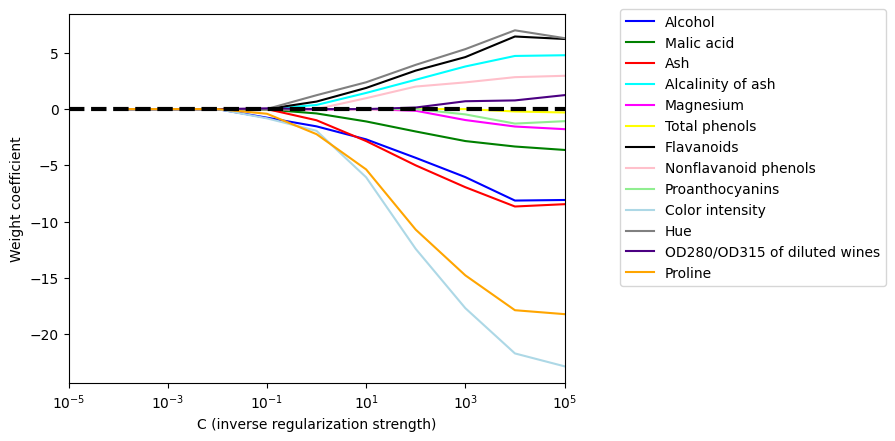

In [ ]:
import matplotlib.pyplot as plt

fig = plt.figure()
ax = plt.subplot(111)

colors = ['blue', 'green', 'red', 'cyan',
          'magenta', 'yellow', 'black',
          'pink', 'lightgreen', 'lightblue',
          'gray', 'indigo', 'orange']

weights, params = [], []
# 규제 강도를 다르게 하기
for c in np.arange(-4., 6.):
    lr = LogisticRegression(penalty='l1', C=10.**c, solver='liblinear',
                            multi_class='ovr', random_state=0)
    lr.fit(X_train_std, y_train)
    weights.append(lr.coef_[1])
    params.append(10**c)

weights = np.array(weights)

for column, color in zip(range(weights.shape[1]), colors):
    plt.plot(params, weights[:, column],
             label=df_wine.columns[column + 1],
             color=color)
plt.axhline(0, color='black', linestyle='--', linewidth=3)
plt.xlim([10**(-5), 10**5])
plt.ylabel('Weight coefficient')
plt.xlabel('C (inverse regularization strength)')
plt.xscale('log')
plt.legend(loc='upper left')
ax.legend(loc='upper center',
          bbox_to_anchor=(1.38, 1.03),
          ncol=1, fancybox=True)

#plt.savefig('figures/04_08.png', dpi=300,
#            bbox_inches='tight', pad_inches=0.2)

plt.show()

또 다른 특성 선택 방법 : 랜덤포레스트로 특성 중요도 사용

 1) Proline                        0.185453
 2) Flavanoids                     0.174751
 3) Color intensity                0.143920
 4) OD280/OD315 of diluted wines   0.136162
 5) Alcohol                        0.118529
 6) Hue                            0.058739
 7) Total phenols                  0.050872
 8) Magnesium                      0.031357
 9) Malic acid                     0.025648
10) Proanthocyanins                0.025570
11) Alcalinity of ash              0.022366
12) Nonflavanoid phenols           0.013354
13) Ash                            0.013279


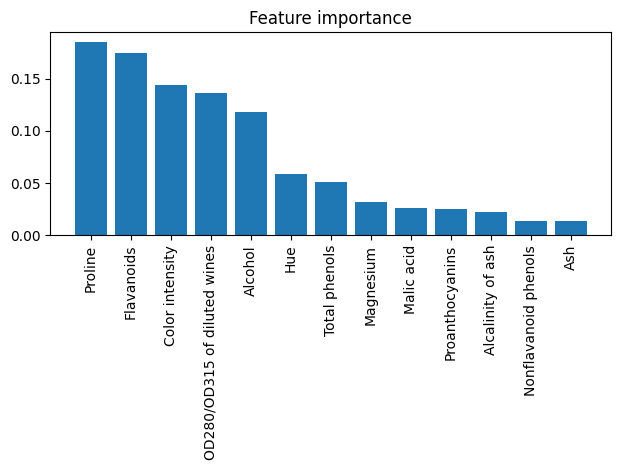

In [ ]:
# 랜덤포레스트를 통해 간편하게 중요 특성을 파악할 수 있음.
from sklearn.ensemble import RandomForestClassifier
feature_labels = df_wine.columns[1:]
forest = RandomForestClassifier(n_estimators=500, random_state=1)
forest.fit(X_train, y_train)
# 모델을 훈련시킨 후 데이터에서 중요한 특성을 뽑아내기.
importances = forest.feature_importances_
# np.argsort 통해 배열 정렬 후 정렬된 원소들의 인덱스를 반환
indices = np.argsort(importances)[::-1]
# 훈련 데이터셋의 각 feature들에 대해 중요도 출력
for f in range(X_train.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30,feature_labels[indices[f]], importances[indices[f]]))
plt.title('Feature importance')
plt.bar(range(X_train.shape[1]), importances[indices], align='center')
plt.xticks(range(X_train.shape[1]), feature_labels[indices], rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.tight_layout()
# plt.savefig('figures/04_10.png', dpi=300)
plt.show()

특성을 선택하는 또다른 방법으로는 사이킷런의 SelectFromModel을 이용하는 것도 있음.

In [ ]:
# 모델 훈련이 끝난 후 사용자가 정한 임계값을 기반으로 특성을 선택
from sklearn.feature_selection import SelectFromModel
sfm = SelectFromModel(forest, threshold=0.1, prefit=True)
X_selected = sfm.transform(X_train)
print("이 임계조건을 만족하는 샘플의 수 : ", X_selected.shape[1])

이 임계조건을 만족하는 샘플의 수 :  5


In [ ]:
for f in range(X_selected.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30, feature_labels[indices[f]], importances[indices[f]]))

 1) Proline                        0.185453
 2) Flavanoids                     0.174751
 3) Color intensity                0.143920
 4) OD280/OD315 of diluted wines   0.136162
 5) Alcohol                        0.118529


특성을 선택하는 다른 방법으로는 REF(재귀적 특성 제거)가 있음.

In [ ]:
# 처음에는 모든 특성을 사용해 모델을 만들고 중요도가 가장 낮은 특성을 제거하는 방법.
from sklearn.feature_selection import RFE
# n_features_to_select를 통해 매개변수에 선택할 특성 개수 지정. [0,1]사이의 비율로도 가능.
# 기본적으로 coef_, importance_를 기준으로 특성 제거.
rfe = RFE(forest, n_features_to_select=5)
rfe.fit(X_train, y_train)
# 선택한 특성의 우선순위를 출력. 1번째, 7번째, 10, 12, 13번째 특성이 중요도 1순위임.
rfe.ranking_

array([1, 5, 9, 6, 4, 3, 1, 8, 7, 1, 2, 1, 1])

In [ ]:
# 선택한 특성은 support_에 True로 표시됨
f_mask = rfe.support_
# 훈련된 기반 모델(랜덤포레스트)는 estimator_ 속성에 저장되어 있음.
# 모델의 특성 중요도를 저장
importances = rfe.estimator_.feature_importances_
# 중요도 순서대로 정렬
indices = np.argsort(importances)[::-1]
# 중요도 순서대로 출력
for f in range(5):
    print("%2d) %-*s %f" % (f + 1, 30, feature_labels[f_mask][indices[f]], importances[indices[f]]))

 1) Proline                        0.261512
 2) Color intensity                0.216477
 3) Flavanoids                     0.212259
 4) OD280/OD315 of diluted wines   0.188924
 5) Alcohol                        0.120828


#챕터5(차원 축소)

특성 선택과 마찬가지로 특성 추출 기법을 통해 데이터셋의 특성 개수를 줄일 수 있음. 전자의 경우 원본 특성을 유지하지만 후자의 경우 새로운 특성 공간으로 변환하거나 투영하는 방법

In [1]:
"""
차원 축소를 위한 PCA 알고리즘을 사용하기 위한 단계
1. d차원의 데이터셋을 표준화 전처리
2. 공분산 행렬 구하기
3. 공분산 행렬을 고유벡터와 고윳값으로 분해
4. 고윳값을 내림차순으로 정렬하여 고유벡터의 순위 매기기
5. 고윳값이 가잔 큰 k개의 고유 벡터를 선택. 이때 k는 새로운 특성 부분 공간의 차원(k<=d)
6. 최상위 k개의 고유벡터로 투영행렬 W를 만듦.
7. 투영행렬 W를 사용해서 d차원의 입력 데이터셋 X를 새로운 k차원의 특성 부분공간으로 변환
"""

'\n차원 축소를 위한 PCA 알고리즘을 사용하기 위한 단계\n1. d차원의 데이터셋을 표준화 전처리\n2. 공분산 행렬 구하기\n3. 공분산 행렬을 고유벡터와 고윳값으로 분해\n4. 고윳값을 내림차순으로 정렬하여 고유벡터의 순위 매기기\n5. 고윳값이 가잔 큰 k개의 고유 벡터를 선택. 이때 k는 새로운 특성 부분 공간의 차원(k<=d)\n6. 최상위 k개의 고유벡터로 투영행렬 W를 만듦.\n7. 투영행렬 W를 사용해서 d차원의 입력 데이터셋 X를 새로운 k차원의 특성 부분공간으로 변환\n'

우선 1~4번을 진행

In [2]:
# 우선 챕터4의 Wine 데이터셋 호출
import pandas as pd
df_wine = pd.read_csv('https://archive.ics.uci.edu/'
                      'ml/machine-learning-databases/wine/wine.data',
                      header=None)

In [3]:
from sklearn.model_selection import train_test_split
# feature와 타깃값으로 데이터를 나눠서 X, y에 저장
X, y = df_wine.iloc[:,1:].values, df_wine.iloc[:,0].values
# Wine 데이터셋을 7:3 비율로 훈련데이터셋과 테스트 데이터셋으로 나누고
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,stratify=y,random_state=0)
# 특성을 표준화 전처리
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train) # 훈련데이터셋에 대해 표준화를 진행 후, 이때 학습한 표준화를 위한 파라미터를
X_test_std = sc.transform(X_test) # 여기서 사용하여 테스트데이터셋도 훈련데이터셋에서 학습한 파리미터로 표준화 진행

In [4]:
# 공분산 행렬은 (d,d) 크기. 이때 d는 데이터셋의 차원 개수.
import numpy as np
# 표준화 전처리 된 훈련데이터셋의 공분산 행렬 구하기
cov_mat = np.cov(X_train_std.T)
# 그렇게 구한 공분산 행렬의 고윳값, 고유벡터 구하기. 13개의 고윳값과 이에 대응되는 고유벡터가 열에 저장된 (13,13) 크기의 행렬을 얻음.
eigen_vals, eigen_vecs = np.linalg.eig(cov_mat)
print('고윳값 \n', eigen_vals)

고윳값 
 [4.84274532 2.41602459 1.54845825 0.96120438 0.84166161 0.6620634
 0.51828472 0.34650377 0.3131368  0.10754642 0.21357215 0.15362835
 0.1808613 ]


In [ ]:
843페이지 중 181페이지 5.1.3부터 봐야 됨